<a href="https://colab.research.google.com/github/easmet/datacoder/blob/main/ProyectoDSParteI%2BAsmet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#**Hábitos de consumo**








El siguiente dataset contiene 3900 registros de consumidores finales en tiendas de EEUU, por lo que puede resultar útil para identificar patrones de consumo de la población.
Contempla datos personales del compradores, tales como la edad y género, así como también información sobre su adqusición (producto adquirido, monto gastado) y sus hábitos de compra (como la frecuencia de compra, medio de pago usado y el uso de descuentos, etc).
Algunas de las preguntas que pueden surgir en estos primeros contactos con la información son los siguientes:

*   ¿Existen diferencias en el comportamiento según los factores sociales, tales como el género y la edad?
*   ¿Qué categorías de productos generan mayor recaudación?
*   ¿Los consumidores realizan más compras cuando los productos tienen descuentos?

Trataré de extraer conclusiones respecto a esos y más temas en el desarrollo de este trabajo.







## **Dataset**

In [2]:
# @title
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


url='https://raw.githubusercontent.com/easmet/datacoder/refs/heads/main/shopping_behavior_updated%20(1).csv'

df = pd.read_csv(url, sep=',', header=0)

columnas = [
    "ID Consumidor",
    "Edad",
    "Género",
    "Producto comprado",
    "Categoría",
    "Monto de la compra (USD)",
    "Ubicación",
    "Talle",
    "Color",
    "Temporada",
    "Rating Reseña",
    "Estado de suscripción",
    "Descuento aplicado",
    "Compras previas",
    "Método de pago",
    "Frecuencia de compra"
]

df.columns = columnas

display(df)


,ID Consumidor,Edad,Género,Producto comprado,Categoría,Monto de la compra (USD),Ubicación,Talle,Color,Temporada,Rating Reseña,Estado de suscripción,Descuento aplicado,Compras previas,Método de pago,Frecuencia de compra
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,No,24,Venmo,Weekly


# Verificación para saber si el DataSet tiene valores nulos

In [4]:
# @title
df.isnull().sum()

,0
ID Consumidor,0
Edad,0
Género,0
Producto comprado,0
Categoría,0
Monto de la compra,0
Ubicación,0
Talle,0
Color,0
Temporada,0


Este dataset no presenta valores nulos ni perdidos.

# **Visualizaciones**

## Repartición de género

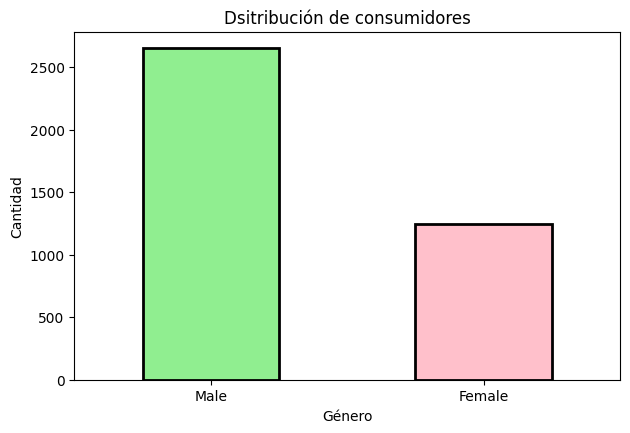

In [92]:

df['Género'].value_counts().plot(kind='bar',color=('lightgreen','pink'), edgecolor='black', linewidth=2)
plt.title('Distribución de consumidores')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.tight_layout()

plt.xticks(rotation=0)
plt.show()

La gran mayoría de los consumidores de esta muestra son hombres.

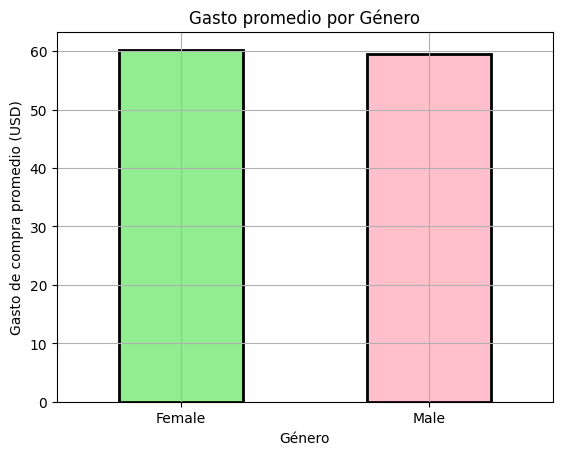

In [107]:
promedio_genero = df.groupby("Género")["Monto de la compra (USD)"].mean()

promedio_genero.plot(kind="bar",color=('lightgreen','pink'), edgecolor='black', linewidth=2)

plt.title("Gasto promedio por Género")
plt.xlabel("Género")
plt.ylabel("Gasto de compra promedio (USD)")
plt.grid(True)
plt.xticks(rotation=0)

plt.show()


Sin embargo, en cuanto al monto de su ticket promedio no hay una diferencia notoria como podría suponerse en un principio.

## Cantidad de compras con y sin descuento

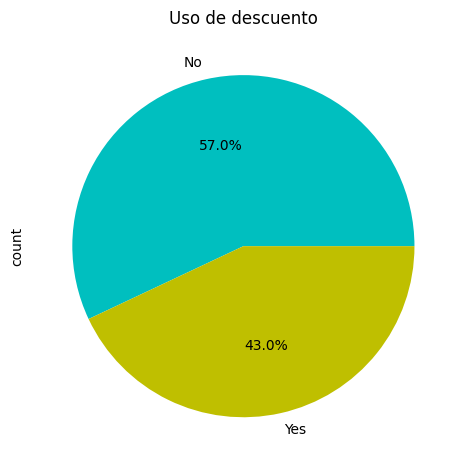

In [95]:

df['Descuento aplicado'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors= 'cyan')
plt.title('Uso de descuento')
plt.tight_layout()

plt.show()

La cantidad de compras de productos "full price" es mayor a las que hacen con descuentos aplicados. Si bien el porcentaje de compras con descuento es considerable, podría inferirse que el consumidor promedio compra ante su necesidad, sin esperar ni buscar una rebaja de precio.

## Ventas por categorías

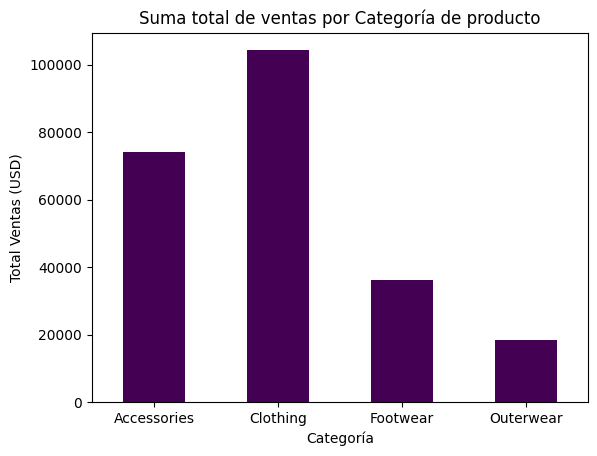

In [109]:
ventas_categoria = df.groupby('Categoría')['Monto de la compra (USD)'].sum()

ventas_categoria.plot(kind="bar", cmap='viridis')

plt.title("Suma total de ventas por Categoría de producto")
plt.xlabel("Categoría")
plt.ylabel("Total Ventas (USD)")
plt.xticks(rotation=0)


plt.show()

La categoría ropa es la que más ingresos registra.

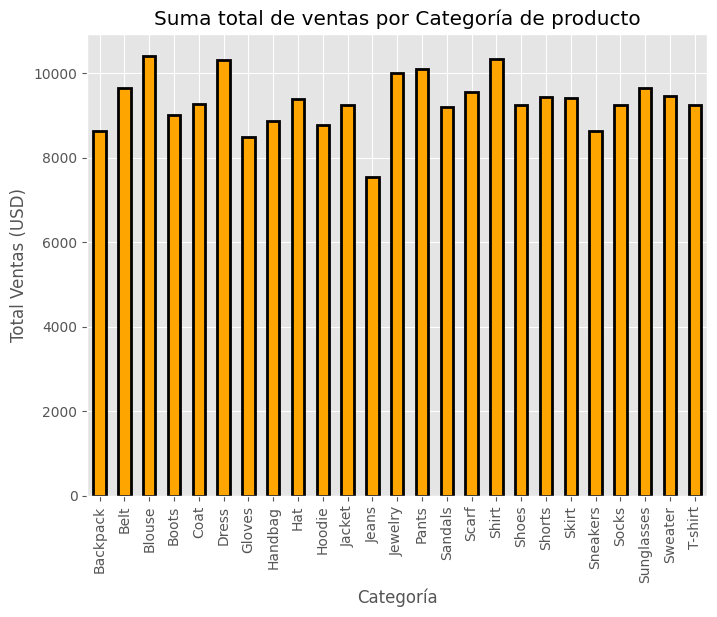

In [142]:


plt.figure(figsize=(8,6))
plt.style.use('ggplot')
productos = df.groupby('Producto comprado')['Monto de la compra (USD)'].sum()

productos.plot(kind="bar", color='orange',edgecolor='black', linewidth=2)

plt.title("Suma total de ventas por Categoría de producto")
plt.xlabel("Categoría")
plt.ylabel("Total Ventas (USD)")
plt.grid(True)
plt.xticks(rotation=90)


plt.show()


El producto que más dinero genera son las blusas, seguido por los vestidos. Las prendas femeninas son las que más ingresos generan.

<Axes: xlabel='Categoría', ylabel='Monto de la compra (USD)'>

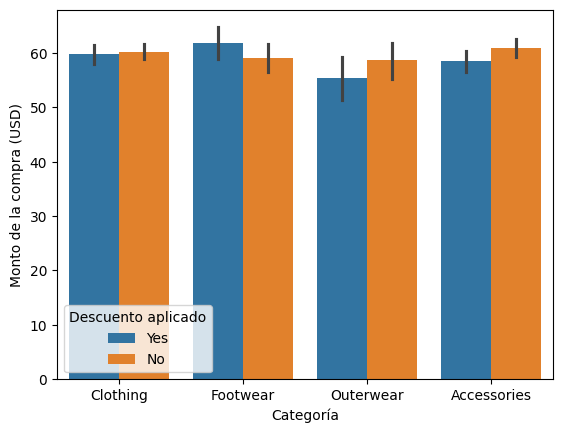

In [121]:

sns.barplot(data=df,x='Categoría', y='Monto de la compra (USD)', hue="Descuento aplicado")


## Compras por edad

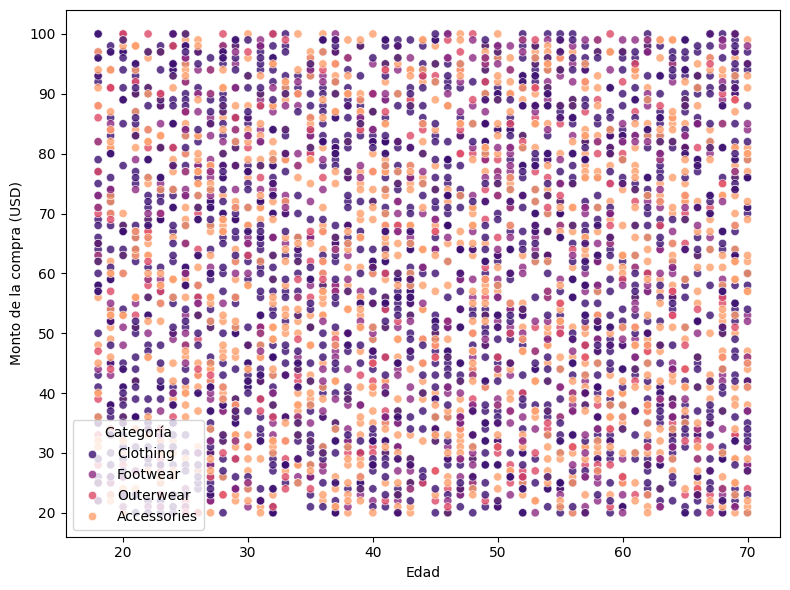

In [75]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Edad', y='Monto de la compra (USD)', hue='Categoría', alpha=0.8, palette='magma', legend='auto')
#'Frecuencia de compra' 'Monto de la compra (USD)' 'Edad'

plt.tight_layout()
#sns.scatterplot.move_legend(ax, "center right")
plt.show()


No se percibe diferencias respecto al monto de las compras y el rango etario.